# 아트데이옥션 온라인 경매

<http://www.artday.co.kr/pages/auction/online-auction.php>

In [1]:
import pandas as pd

pd.__version__

'0.24.2'

In [2]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.1'

In [3]:
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['AppleGothic']

In [4]:
df = pd.read_csv('output/items.csv')

df.head()

,title,artist,price,image
0,제주생활의 중도,이왈종,"25,000,000원",http://www.artday.co.kr/_img/data/1911/T/051 1...
1,닭,김종학,"12,000,000원",http://www.artday.co.kr/_img/data/1911/T/052 1...
2,우주,이희중,"1,000,000원",http://www.artday.co.kr/_img/data/1911/T/053 1...
3,마을이야기,황영성,"600,000원",http://www.artday.co.kr/_img/data/1911/T/054 1...
4,장미,오승우,"1,300,000원",http://www.artday.co.kr/_img/data/1911/T/055 1...


In [5]:
from IPython.display import Image, display

for image in df['image'][:5]:
    display(Image(url=image, width=100))

In [6]:
df['price'] = df['price'].str.replace('원', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(int) / 1_0000

df.head()

,title,artist,price,image
0,제주생활의 중도,이왈종,2500.0,http://www.artday.co.kr/_img/data/1911/T/051 1...
1,닭,김종학,1200.0,http://www.artday.co.kr/_img/data/1911/T/052 1...
2,우주,이희중,100.0,http://www.artday.co.kr/_img/data/1911/T/053 1...
3,마을이야기,황영성,60.0,http://www.artday.co.kr/_img/data/1911/T/054 1...
4,장미,오승우,130.0,http://www.artday.co.kr/_img/data/1911/T/055 1...


In [7]:
price_counts = df['price'].value_counts()

price_df = pd.DataFrame(price_counts)
price_df = price_df.reset_index()
price_df.columns = ['price', 'count']

price_df

,price,count
0,30.0,21
1,20.0,17
2,40.0,14
3,80.0,12
4,60.0,12
5,50.0,12
6,100.0,8
7,150.0,7
8,70.0,7
9,300.0,6


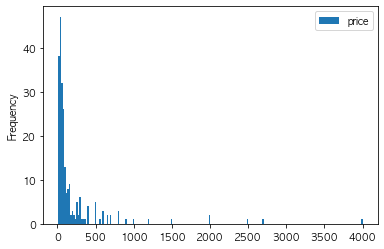

In [8]:
df.plot.hist(bins=200)

plt.show()

In [9]:
artist_counts = df['artist'].value_counts()

artist_df = pd.DataFrame(artist_counts)
artist_df = artist_df.reset_index()
artist_df.columns = ['artist', 'count']

artist_df

,artist,count
0,작자미상,9
1,운보 김기창,7
2,이수동,6
3,설종보,5
4,최영림,4
5,문형태,4
6,타카시 무라카미,3
7,심향 박승무,3
8,백산 김정옥,3
9,내고 박생광,3


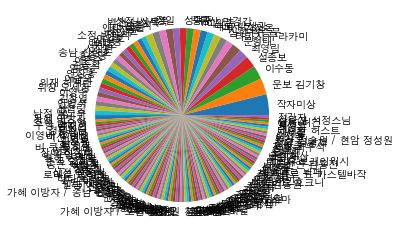

In [10]:
df['artist'].value_counts().plot.pie()

plt.show()